In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pickle

In [2]:
data = pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(500, 9)

In [3]:
data.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [8]:
data = data.drop(axis=1, columns=['Serial No.'])
data['GRE Score'] = data['GRE Score'].fillna(method='ffill')
data['TOEFL Score'] = data['TOEFL Score'].fillna(method='ffill')
data['University Rating'] = data['University Rating'].fillna(method='ffill')

In [9]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

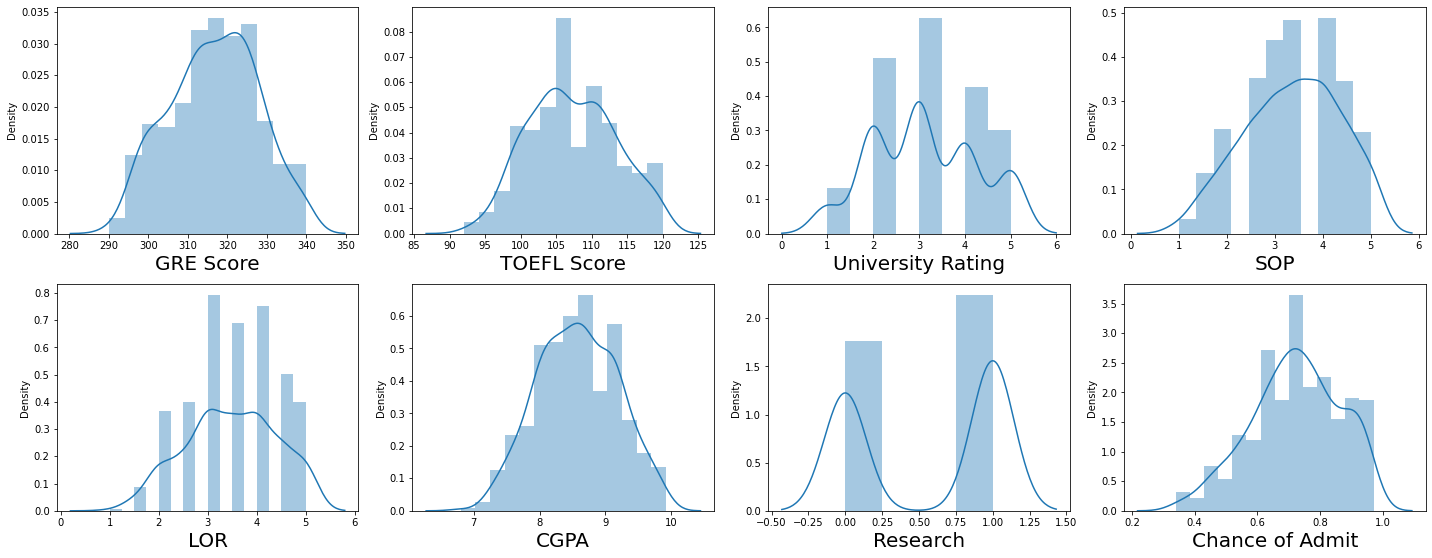

In [12]:
plt.figure(figsize=(20, 15), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [15]:
X = data.drop(axis=1, columns=['Chance of Admit'])
Y = data['Chance of Admit']



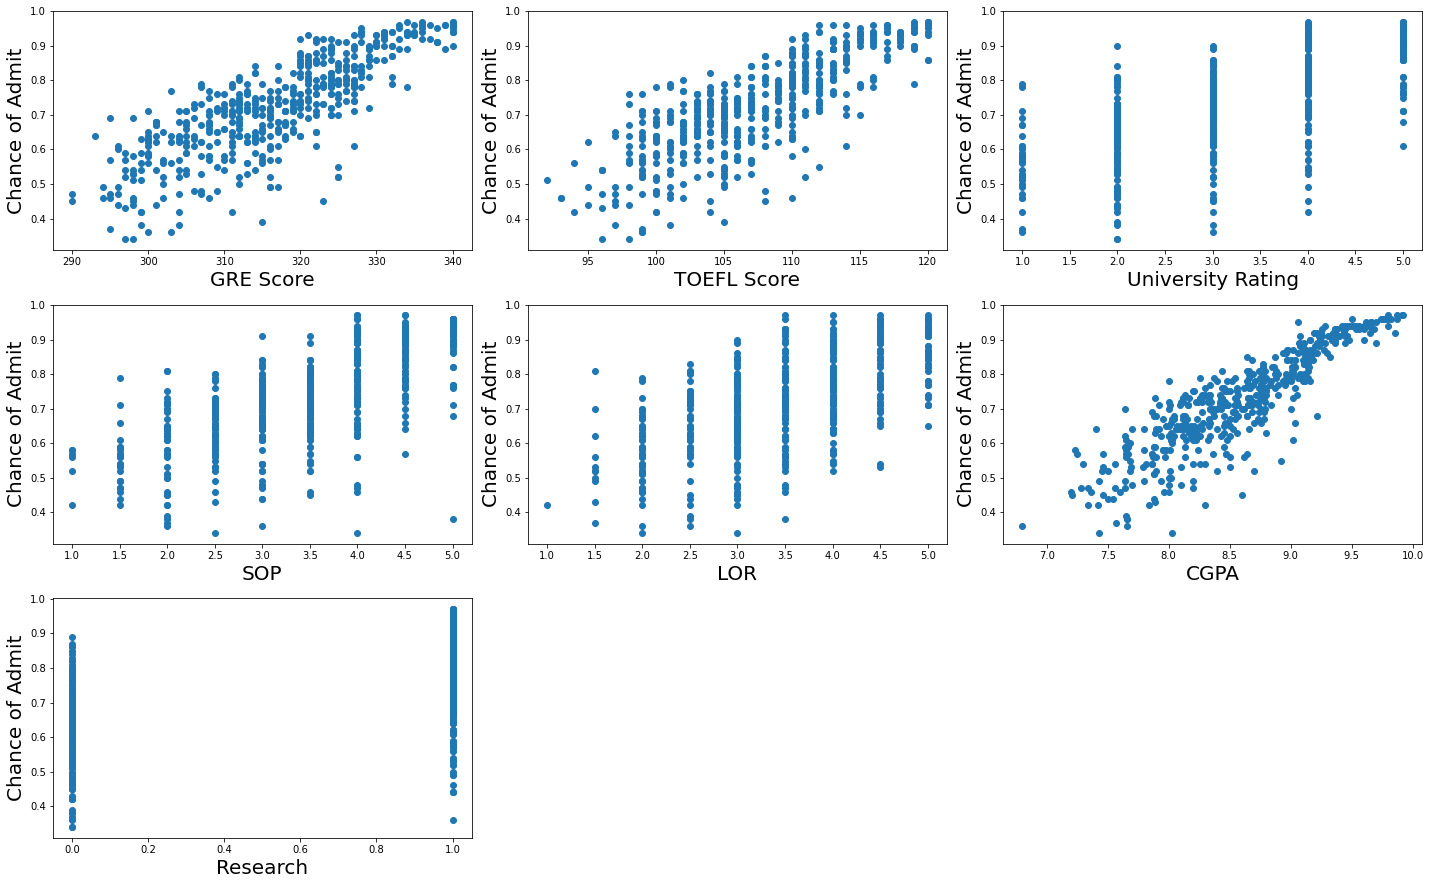

In [18]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column], Y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

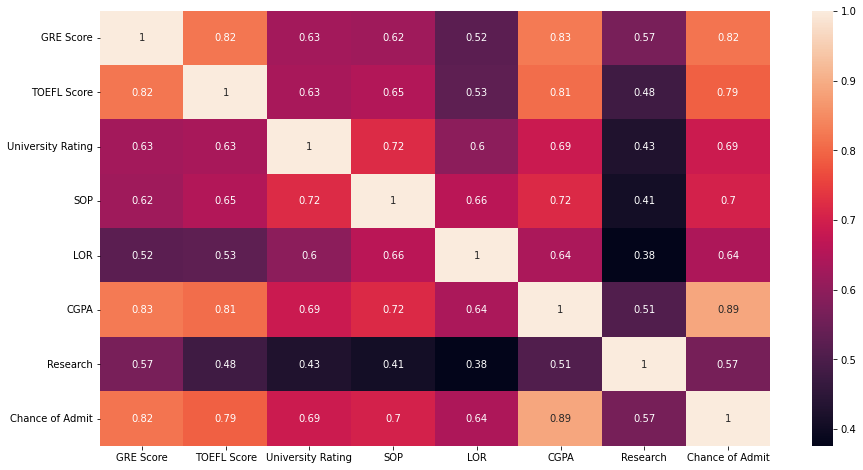

In [19]:
# Check the multicollinearity factor using spearman correlation:

corr = data.corr(method='spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

In [24]:
# Check the multicollinearity factor using VIF:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif_data

,feature,VIF
0,GRE Score,4.260710
1,TOEFL Score,3.831651
2,University Rating,2.492591
3,SOP,2.830438
4,LOR,2.030053
5,CGPA,4.653474
6,Research,1.466555


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.35, random_state=175)
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

# predict:
y_predict = linear_regression.predict(x_test)
y_predict[:5]

array([0.64708248, 0.57460636, 0.64717058, 0.62069335, 0.63675505])

In [37]:
# Get the intercept and co-efficient value:

intercept_c = linear_regression.intercept_
coefficent_m = linear_regression.coef_

print(f"Intercept (c) value is: {intercept_c}")
print(f"Co-efficient (m) value is: {coefficent_m}")

Intercept (c) value is: -1.2384364819388582
Co-efficient (m) value is: [ 0.0012401   0.00297799  0.00205263 -0.00307039  0.01661652  0.13640702
  0.03947182]


In [40]:
# Check the R_Square value based on test data:

y_predict_for_test = linear_regression.predict(x_test)
r2_score_test_data = r2_score(y_test, y_predict_for_test)
print(f"Accuracy For Test data (R-Square):  {r2_score_test_data}")
print(f"Accuracy For Test data (RMSE):  {np.sqrt(mean_squared_error(y_test, y_predict_for_test))}")

Accuracy For Test data (R-Square):  0.8149606387632405
Accuracy For Test data (RMSE):  0.05746702759392744


In [41]:
# Check the R_Square value based on train data:

y_predict_for_train = linear_regression.predict(x_train)
r2_score_train_data = r2_score(y_train, y_predict_for_train)
print(f"Accuracy For Train data (R-Square):  {r2_score_train_data}")
print(f"Accuracy For Train data (RMSE):  {np.sqrt(mean_squared_error(y_train, y_predict_for_train))}")

Accuracy For Train data (R-Square):  0.8185005570163866
Accuracy For Train data (RMSE):  0.06167703374145325


In [32]:
# Save or Dump the model:

filename = 'LinearModel.pickle'
pickle.dump(linear_regression, open(filename, 'wb'))

In [36]:
# Load the model for prediction:

load_model = pickle.load(open('LinearModel.pickle', 'rb'))
predict = load_model.predict([[350.25, 102, 3.5, 3.5, 4.5, 9.65, 1]])
predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0.92667556])